# Computer Vision for Medical Imaging: Replicating a CNN for Brain Tumor Classification

Importing dependencies

In [4]:
import torch
import torchvision
from torch import nn
from torchvision import datasets, models, transforms


In [9]:
import requests
import zipfile
from pathlib import Path

We will first create designated folders for the medical images

In [11]:
data_path = Path("./data/")
image_path = data_path / "images"

if image_path.is_dir():
  print(f"{image_path} already exists")
else:
  print("making image path")
  image_path.mkdir(parents = True, exist_ok = True)
  print(f"{image_path} created")

making image path
data/images created


In [12]:
from google.colab import files
files.upload()

Saving Brain_Tumor_Dataset (1).zip to Brain_Tumor_Dataset (1).zip


{'Brain_Tumor_Dataset (1).zip': b'PK\x03\x04\x14\x00\x08\x08\x08\x00\x00\x00!\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00)\x00_\x00Brain_Tumor_Dataset/Testing/NO/no1468.jpgUT\x05\x00\x01\xfe\x84\x90a\n\x00 \x00\x00\x00\x00\x00\x01\x00\x18\x00\x00\xd3=B\t\xd9\xd7\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00up.\x00\x014\xdc\x91\x83Brain_Tumor_Dataset/Testing/NO/no1468.jpg\x01\x81!~\xde\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x00\xe1\x00\xe1\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00

In [18]:
! pwd

/content


In [21]:
mv /content/Brain_Tumor_Dataset.zip /content/data

In [25]:
with zipfile.ZipFile(data_path/"Brain_Tumor_Dataset.zip", "r") as zip_ref:
  zip_ref.extractall(image_path)


In [27]:
train_dir = image_path/"Brain_Tumor_Dataset"/"Training"
test_dir =  image_path/"Brain_Tumor_Dataset"/"Testing"

In [ ]:
/content/data/images/Brain_Tumor_Dataset/Training

In [34]:
from glob import glob

In [59]:
images_list = glob("/content/data/images/Brain_Tumor_Dataset/Training/*/*.jpg")

In [55]:
import random
import os
random_image_path = random.choice(images_list)
random_image_class = Path(random_image_path).parent.stem
random_image_class

'YES'

In [42]:
import matplotlib.pyplot as plt

Visualize, visualize, visualize

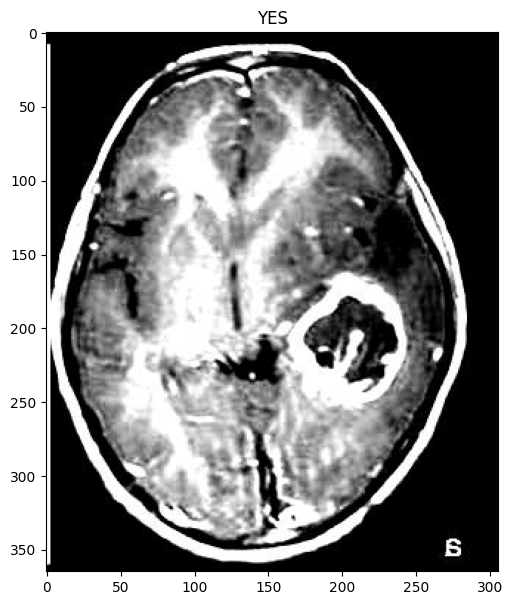

In [56]:
plt.figure(figsize=(10,7))
img = plt.imread(random_image_path)
plt.title(random_image_class)
plt.imshow(img, cmap="gray")
plt.show()

Let's visualize random images

In [61]:
images_list_random = random.sample(images_list, k=9)

In [72]:
images_list_random

['/content/data/images/Brain_Tumor_Dataset/Training/YES/y24.jpg',
 '/content/data/images/Brain_Tumor_Dataset/Training/YES/y35.jpg',
 '/content/data/images/Brain_Tumor_Dataset/Training/NO/no94.jpg',
 '/content/data/images/Brain_Tumor_Dataset/Training/NO/no89.jpg',
 '/content/data/images/Brain_Tumor_Dataset/Training/YES/y32.jpg',
 '/content/data/images/Brain_Tumor_Dataset/Training/NO/no76.jpg',
 '/content/data/images/Brain_Tumor_Dataset/Training/NO/no87.jpg',
 '/content/data/images/Brain_Tumor_Dataset/Training/YES/y26.jpg',
 '/content/data/images/Brain_Tumor_Dataset/Training/YES/y39.jpg']

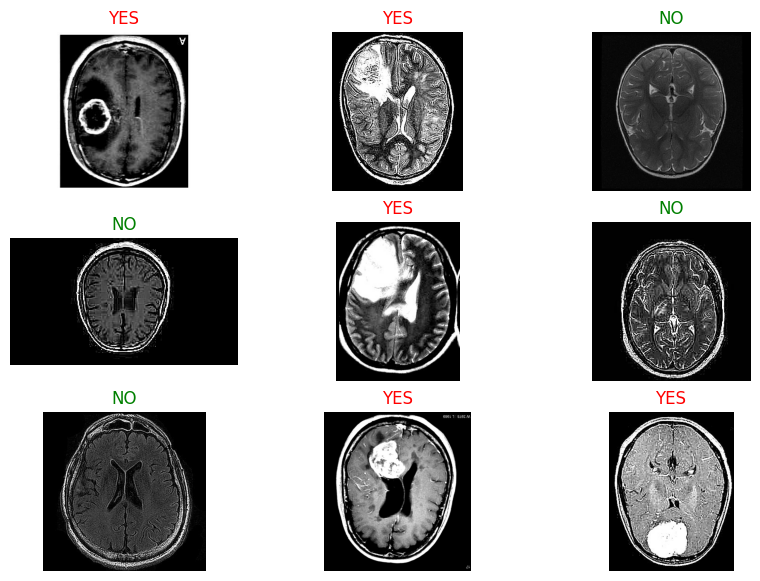

In [126]:
rows = 3
cols = 3
my_list = list(range(1,10))
plt.figure(figsize=(10,7))
for i in range(9):
  img = Path(images_list_random[i])
  plt.subplot(rows, cols, my_list[i])
  a = plt.imread(img)
  plt.imshow(a, cmap="gray")
  if img.parent.stem == "YES":
    plt.title(img.parent.stem, c = "red")
  else:
    plt.title(img.parent.stem, c = "green")
  plt.axis(False)

In [85]:
from torch.utils.data import DataLoader


In [86]:
data_transform = transforms.Compose([
    transforms.Resize(size=(124, 124)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

In [87]:
from torchvision import datasets
train_data = datasets.ImageFolder(root=train_dir,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_dir,
                                 transform=data_transform)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 50
    Root location: data/images/Brain_Tumor_Dataset/Training
    StandardTransform
Transform: Compose(
               Resize(size=(124, 124), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 41
    Root location: data/images/Brain_Tumor_Dataset/Testing
    StandardTransform
Transform: Compose(
               Resize(size=(124, 124), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [88]:
class_names = train_data.classes
class_names

['NO', 'YES']

In [89]:
from torch.utils.data import DataLoader
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=1,
                              num_workers=1,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=1,
                             num_workers=1,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7b4d42e62770>,
 <torch.utils.data.dataloader.DataLoader at 0x7b4d42e63820>)

In [99]:
img, label = next(iter(train_dataloader))

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {label.shape}")

Image shape: torch.Size([1, 3, 124, 124]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([1])


In [91]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [106]:
class TinyVGG(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int) -> None:
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*31*31,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
      return self.classifier(self.conv_block_2(self.conv_block_1(x)))

torch.manual_seed(42)
model = TinyVGG(input_shape=3,
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)
model

TinyVGG(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=9610, out_features=2, bias=True)
  )
)

In [107]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    model.train()

    train_loss, train_acc = 0, 0

    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

In [108]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

In [109]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )


        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    return results

In [110]:
# Set random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 5

# Recreate an instance of TinyVGG
model = TinyVGG(input_shape=3, # number of color channels (3 for RGB)
                  hidden_units=10,
                  output_shape=len(train_data.classes)).to(device)

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_0_results = train(model=model,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 0.7636 | train_acc: 0.4200 | test_loss: 0.6876 | test_acc: 0.4878
Epoch: 2 | train_loss: 0.6631 | train_acc: 0.6000 | test_loss: 0.5163 | test_acc: 0.7805
Epoch: 3 | train_loss: 0.4400 | train_acc: 0.8200 | test_loss: 0.5748 | test_acc: 0.6829
Epoch: 4 | train_loss: 0.2354 | train_acc: 0.9200 | test_loss: 0.1903 | test_acc: 0.9268
Epoch: 5 | train_loss: 0.1921 | train_acc: 0.9400 | test_loss: 0.3131 | test_acc: 0.8537
Total training time: 8.455 seconds


In [127]:
def make_predictions(model: torch.nn.Module, data: list, device: torch.device = device):
    pred_probs = []
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # Prepare sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # Add an extra dimension and send sample to device

            # Forward pass (model outputs raw logit)
            pred_logit = model(sample)

            # Get prediction probability (logit -> prediction probability)
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

            # Get pred_prob off GPU for further calculations
            pred_probs.append(pred_prob.cpu())

    # Stack the pred_probs to turn list into a tensor
    return torch.stack(pred_probs)

In [128]:
import random
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# View the first test sample shape and label
print(f"Test sample image shape: {test_samples[0].shape}\nTest sample label: {test_labels[0]} ({class_names[test_labels[0]]})")

Test sample image shape: torch.Size([3, 124, 124])
Test sample label: 1 (YES)


In [129]:
# Make predictions on test samples with model 2
pred_probs= make_predictions(model=model,
                             data=test_samples)

# View first two prediction probabilities list
pred_probs[:5]

tensor([[0.0729, 0.9271],
        [0.9935, 0.0065],
        [0.9881, 0.0119],
        [0.9755, 0.0245],
        [0.0235, 0.9765]])

In [130]:
# Turn the prediction probabilities into prediction labels by taking the argmax()
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([1, 0, 0, 0, 1, 0, 1, 0, 0])

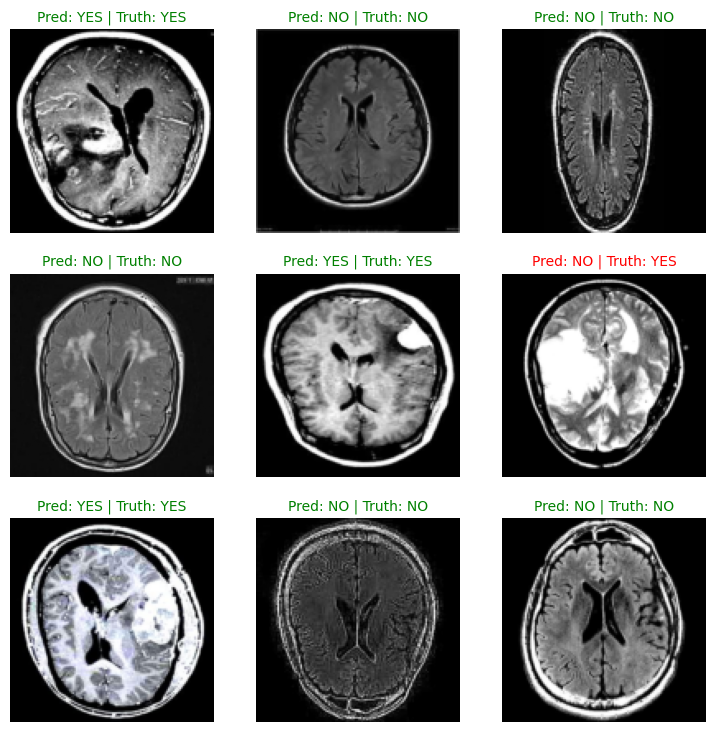

In [131]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Create a subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the target image
  sample = sample.permute(1, 2, 0)
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction label
  pred_label = class_names[pred_classes[i]]

  # Get the truth label
  truth_label = class_names[test_labels[i]]

  # Create the title text of the plot
  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality and change title colour accordingly
  if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
  else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
  plt.axis(False);